# Word Vectors

In this notebook, we create word vectors from a corpus of public-domain books, a selection from [Project Gutenberg](https://www.gutenberg.org/).

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

Download an English-language sentence tokenizer (not all periods end sentences; not all sentences start with a capital letter)

In [2]:
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /Users/pmui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /Users/pmui/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [5]:
from nltk.corpus import gutenberg
len(gutenberg.fileids())

18

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Tokenize the whole Gutenberg dataset to start

In [56]:
sent_tokens = gutenberg.sents()
sent_tokens[0:6]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

In [57]:
sent_tokens[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

Running Word2Vec to get the word vectors for Emma

In [58]:
len(gutenberg.words())

2621613

In [59]:
#model = Word2Vec(sentences=sent_tokens, vector_size=64, sg=1, window=10, min_count=5, workers=8)

In [60]:
#model.save("raw_gutenberg_model.w2v")

In [27]:
# loading a saved model
model = gensim.models.Word2Vec.load("raw_gutenberg_model.w2v")

In [61]:
model.wv['family']

array([ 0.01370176,  0.22500455, -0.05491016, -0.1497299 , -0.39918563,
       -0.9466593 , -0.23806794,  0.06541684, -0.5867431 ,  0.30739272,
        0.29969707, -1.0434798 , -0.6723457 ,  0.23000027, -0.02115234,
        0.367245  ,  0.29904786,  0.08746465, -0.24358644,  0.22357315,
       -0.76923054,  0.09547183, -0.7056944 , -0.01593498,  0.11702862,
        0.03967537, -0.84854954,  0.30024785, -0.45569143, -0.22919582,
        0.16489261,  0.4144973 ,  0.15083969, -0.46133596,  0.48821652,
       -0.20048411, -0.06484802, -0.01160421,  0.17056887,  0.726382  ,
        0.05902689,  0.254967  ,  0.05261955,  0.07178308, -0.18504174,
        0.8067065 , -0.5149449 , -0.57864046, -0.24244928,  0.02294801,
       -0.34703016,  0.28952575,  0.15114594, -0.6846604 ,  0.22382724,
        0.8493356 ,  0.22802389, -0.13548031,  0.30732042,  0.73340213,
       -0.70284235, -0.18872747,  0.4432426 ,  0.63178104], dtype=float32)

In [62]:
len(model.wv['family'])

64

In [63]:
model.wv.most_similar('family')

[('tribe', 0.7183826565742493),
 ('families', 0.7014538049697876),
 ('possession', 0.6622105240821838),
 ('estate', 0.6603050231933594),
 ('married', 0.6488141417503357),
 ('Simeon', 0.645974338054657),
 ('Hebronites', 0.6380577087402344),
 ('principal', 0.6346883773803711),
 ('Levi', 0.6340548396110535),
 ('Yorkshire', 0.6309234499931335)]

In [64]:
model.wv.most_similar('mother')

[('sister', 0.8769340515136719),
 ('father', 0.8622261881828308),
 ('brother', 0.8195726871490479),
 ('husband', 0.8162870407104492),
 ('wife', 0.8079290390014648),
 ('daughter', 0.7986083030700684),
 ('child', 0.7753573656082153),
 ('Amnon', 0.7469168305397034),
 ('Mary', 0.7448557615280151),
 ('nurse', 0.7387875914573669)]

In [65]:
model.wv.most_similar('morning')

[('evening', 0.8844550251960754),
 ('day', 0.790565013885498),
 ('early', 0.779312252998352),
 ('night', 0.7577750086784363),
 ('afternoon', 0.7505846619606018),
 ('dinner', 0.7242652773857117),
 ('week', 0.722480297088623),
 ('Saturday', 0.7215426564216614),
 ('Early', 0.7043284177780151),
 ('morrow', 0.7010214924812317)]

In [66]:
model.wv.doesnt_match("mother father sister carriage".split())

'carriage'

In [67]:
model.wv.similarity('father', 'mother')

0.8622261

In [68]:
model.wv.similarity('father', 'house')

0.57134414

In [69]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man'])

[('wife', 0.7734214067459106),
 ('mother', 0.7695086598396301),
 ('daughter', 0.7631699442863464),
 ('husband', 0.7569361925125122),
 ('sister', 0.752987802028656),
 ('brother', 0.724442720413208),
 ('daughters', 0.7116524577140808),
 ('Rachel', 0.704686164855957),
 ('Sarah', 0.7033936977386475),
 ('Sarai', 0.6915766596794128)]

In [70]:
model.wv.most_similar(positive=['love', 'woman'], negative=['man'])

[('loved', 0.6622974276542664),
 ('dearly', 0.6467137932777405),
 ('lewdness', 0.6300287246704102),
 ('remembrance', 0.6279667615890503),
 ('chaste', 0.6238080263137817),
 ('blessings', 0.6226779818534851),
 ('lovers', 0.6211674809455872),
 ('praise', 0.6199450492858887),
 ('charity', 0.6140302419662476),
 ('whoredoms', 0.6042092442512512)]

## Dimensionality Reduction to 2-D for Visualization

In [71]:
len(model.wv.key_to_index)

17011

In [77]:
tsne = TSNE(n_components=2, n_iter=1000, init='pca')  

In [78]:
X = model.wv[model.wv.key_to_index]
X_2d = tsne.fit_transform(X)

/Users/pmui/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/pmui/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [79]:
X_2d[0:5]

array([[ -6.8539524, -37.36104  ],
       [ -6.779822 , -37.361275 ],
       [ -6.7653074, -37.521152 ],
       [ -7.761465 , -38.0432   ],
       [ -6.3467727, -37.577957 ]], dtype=float32)

In [81]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.key_to_index.keys()

In [82]:
#coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

## Visualize 2D representation of word vectors

In [83]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')
coords_df.head()

,x,y,token
0,-6.853952,-37.361040,","
1,-6.779822,-37.361275,the
2,-6.765307,-37.521152,and
3,-7.761465,-38.043200,.
4,-6.346773,-37.577957,of


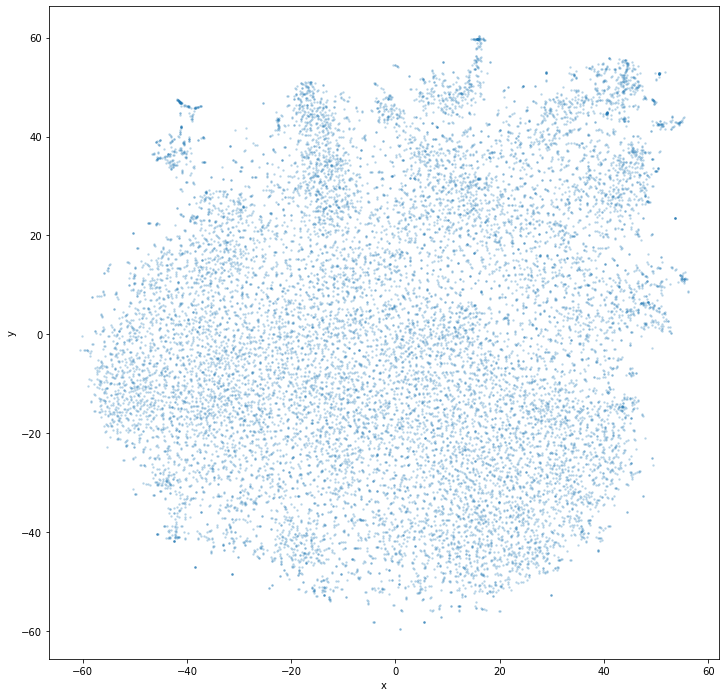

In [84]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [85]:
# output bokeh plots inline in this notebook 

output_notebook()

Loading BokehJS ...

In [90]:
subset_df = coords_df.sample(n=500)

In [91]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [92]:
show(p)

## Pre-Trained Word Vectors

Existing pre-trained word vectors can be found at:
- word2vec: (English) https://github.com/3Top/word2vec-api, (non-English) github.com/Kyubyong/wordvectors
- GloVe: nlp.stanford.edu/projects/glove
- fastText: fasttext.cc

Francois Chollet has a well written post in the [Keras Blog](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html) on this topic.

Gensim comes with several already pre-trained models, in the Gensim-data repository:

In [110]:
import gensim.downloader 

# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [112]:
# warning: this is a 1.7GB download
googlenews_vectors = gensim.downloader.load('word2vec-google-news-300')

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.3% 55.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.2% 87.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.2% 119.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.5% 158.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.7% 194.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.1% 235.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.1% 267.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 18.1% 300.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.3% 371.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.2% 401.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.2% 535.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 34.1% 567.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.9% 597.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.9% 629.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.8% 661.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 41.7% 693.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.6% 724.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.4% 755.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.4% 787.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.6% 824.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 52.0% 864.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.5% 906.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.9% 946.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.2% 984.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.4% 1021.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 64.0% 1064.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 66.4% 1104.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================----------------] 68.9% 1145.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.3% 1185.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.8% 1226.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 76.2% 1266.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.6% 1306.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 80.9% 1345.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.4% 1387.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.7% 1425.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================================------] 88.3% 1467.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.7% 1507.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.1% 1547.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 95.5% 1588.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 98.0% 1629.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 100.0% 1662.4/1662.8MB downloaded


In [113]:
googlenews_vectors.most_similar('family')

[('relatives', 0.6662651896476746),
 ('familiy', 0.6517067551612854),
 ('families', 0.6252894401550293),
 ('siblings', 0.6140850186347961),
 ('friends', 0.6128395199775696),
 ('mother', 0.6065612435340881),
 ('fam_ily', 0.5926255583763123),
 ('famiy', 0.5916980504989624),
 ('famliy', 0.5840003490447998),
 ('aunt', 0.5811319351196289)]

In [114]:
googlenews_vectors.most_similar(positive=['father', 'woman'], negative=['man'])

[('mother', 0.8462507128715515),
 ('daughter', 0.7899606823921204),
 ('husband', 0.7560456991195679),
 ('son', 0.7279756665229797),
 ('eldest_daughter', 0.7120418548583984),
 ('niece', 0.7096832990646362),
 ('aunt', 0.6960804462432861),
 ('grandmother', 0.689734160900116),
 ('sister', 0.6895190477371216),
 ('daughters', 0.6731120944023132)]

In [123]:
googlenews_vectors.most_similar(positive=['tokyo', 'spain'], negative=['japan'])

[('barcelona', 0.5641589760780334),
 ('madrid', 0.5531224012374878),
 ('sweden', 0.5319081544876099),
 ('luis', 0.5283914804458618),
 ('alex', 0.5277433395385742),
 ('diego', 0.5276082754135132),
 ('hong_kong', 0.526089072227478),
 ('italy', 0.5217777490615845),
 ('los_angeles', 0.5217476487159729),
 ('london', 0.5210322141647339)]

In [125]:
googlenews_vectors.most_similar(positive=['love', 'woman'], negative=['man'])

[('adore', 0.5677226185798645),
 ('loved', 0.5532373189926147),
 ('loves', 0.5279984474182129),
 ('romance', 0.508080244064331),
 ('absolutely_adore', 0.5061413049697876),
 ('brotherly_sisterly', 0.49159693717956543),
 ('virginal_bride', 0.48833003640174866),
 ('coolest_chick', 0.48740699887275696),
 ('Ilove', 0.4870930314064026),
 ('romantic', 0.48444706201553345)]